In [39]:
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
import xlsxwriter
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas import DataFrame
import io
import matplotlib.pyplot as plt # plotting library
import matplotlib as mpl
from pandas.plotting import register_matplotlib_converters
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# backend for rendering plots within the browser
%matplotlib inline 

In [40]:
#download USDCNH data
GBAFX = pd.read_excel('https://onedrive.live.com/download?cid=C73A094D86B6AF24&resid=C73A094D86B6AF24%217884&authkey=APIIf1KL4Z162xk&em=2') 
GBAFX.head()

HKFX = pd.read_excel('https://onedrive.live.com/download?cid=C73A094D86B6AF24&resid=C73A094D86B6AF24%217892&authkey=ABIe4UFVt1p-vFg&em=2') 
HKFX.head()


,Exchange Date,Bid,Ask,Mid,High,Low,Open,RefreshRate,BidNet,Bid%Chg
0,2019-07-31,6.8902,6.8908,6.89050,6.8959,6.8844,6.8884,52919,0.0016,0.000232
1,2019-07-30,6.8886,6.8905,6.88955,6.8950,6.8825,6.8924,90904,-0.0024,-0.000348
2,2019-07-29,6.8910,6.8949,6.89295,6.9001,6.8772,6.8819,63874,0.0102,0.001482
3,2019-07-26,6.8808,6.8834,6.88210,6.8836,6.8695,6.8718,73396,0.0094,0.001368
4,2019-07-25,6.8714,6.8761,6.87375,6.8780,6.8671,6.8757,86438,-0.0038,-0.000553


In [41]:
#Hang Seng Stock Connect Greater Bay Area Composite Index data
GBAindex = pd.read_excel ('https://onedrive.live.com/download?cid=C73A094D86B6AF24&resid=C73A094D86B6AF24%217883&authkey=AND3e4vIS1p2cCg&em=2') 
GBAindex.head()

,Exchange Date,Close,Net,%Chg,Open,Low,High,Mid,Volume,Turnover - HKD,Approx VWAP,O-C,H-L,%CVol,%CTurn
0,2019-07-31,4632.13,-56.36,-0.012000,4664.08,4625.65,4664.08,NaN,NaN,49756.1,NaN,-31.95,38.43,NaN,-0.047046
1,2019-07-30,4688.49,13.10,0.002802,4682.48,4682.23,4715.02,NaN,NaN,52212.5,NaN,6.01,32.79,NaN,0.018524
2,2019-07-29,4675.39,-25.09,-0.005338,4693.18,4653.96,4699.49,NaN,NaN,51262.9,NaN,-17.79,45.53,NaN,0.064133
3,2019-07-26,4700.48,-7.84,-0.001665,4688.18,4682.09,4714.41,NaN,NaN,48173.4,NaN,12.30,32.32,NaN,-0.154758
4,2019-07-25,4708.32,33.19,0.007099,4689.70,4676.63,4710.81,NaN,NaN,56993.6,NaN,18.62,34.18,NaN,-0.039846


In [42]:
#download Hang Seng Stock Connect Hong Kong Index data
HKindex = pd.read_excel ('https://onedrive.live.com/download?cid=C73A094D86B6AF24&resid=C73A094D86B6AF24%217888&authkey=AIdz67-XgNQ_Y_Q&em=2') 
HKindex.head()

,Exchange Date,Close,Net,%Chg,Open,Low,High,Mid,Volume,Turnover - HKD,Approx VWAP,O-C,H-L,%CVol,%CTurn
0,2019-07-31,3466.31,-43.65,-0.012400,3485.34,3457.59,3485.34,NaN,NaN,38667.6,NaN,-19.03,27.75,NaN,0.018788
1,2019-07-30,3509.96,6.08,0.001735,3500.88,3500.88,3525.41,NaN,NaN,37954.5,NaN,9.08,24.53,NaN,-0.125984
2,2019-07-29,3503.88,-27.60,-0.007815,3519.34,3485.95,3524.95,NaN,NaN,43425.4,NaN,-15.46,39.00,NaN,0.048219
3,2019-07-26,3531.48,-26.87,-0.007551,3538.39,3528.57,3545.45,NaN,NaN,41427.8,NaN,-6.91,16.88,NaN,-0.043942
4,2019-07-25,3558.35,14.78,0.004171,3552.35,3544.50,3560.32,NaN,NaN,43331.9,NaN,6.00,15.82,NaN,-0.008587


Compare GBA index and USDCNH FX

In [43]:
#Pearson Correlation between GBA index 'clsoe' and USDCNH FX 'bid' ---- absolute value 
valueGBACorr = pearsonr(GBAFX['Bid'], GBAindex['Close'])
valueGBACorr

(-0.37450542955247906, 1.596394499396955e-11)

In [44]:
#Spearman Correlaton between GBA index'close' and USDCNH FX 'bid' ---- absolute value 
valueGBACorrr = spearmanr(GBAFX['Bid'], GBAindex['Close'])
valueGBACorrr

SpearmanrResult(correlation=-0.41904080531606863, pvalue=2.586418427678972e-14)

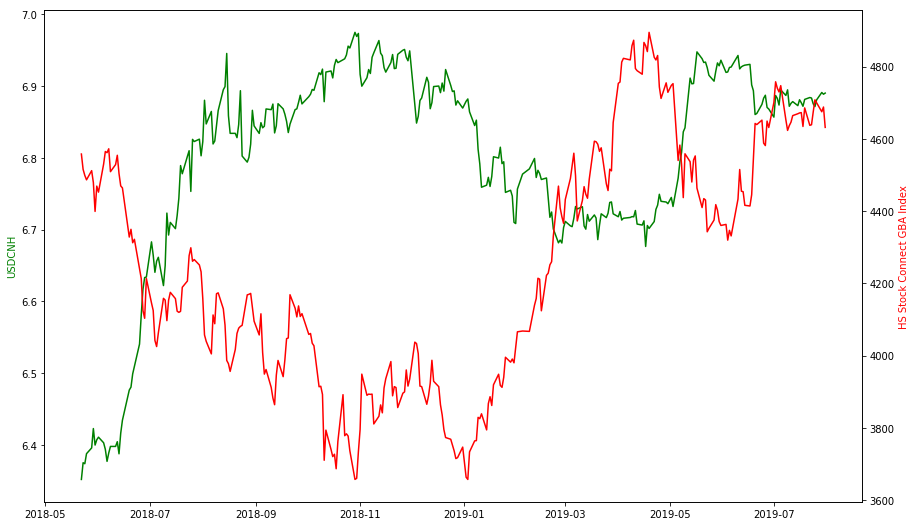

In [45]:
#plot the chart to show the 
df = pd.concat([GBAFX['Exchange Date'], GBAFX['Bid'],GBAindex['Close']], axis = 1, join = 'inner')
fig, ax1 = plt.subplots()

ax1.plot(GBAFX['Exchange Date'], GBAFX['Bid'], color='g')
ax1.set_ylabel('USDCNH', color='g')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(GBAFX['Exchange Date'], GBAindex['Close'], color='r')
ax2.set_ylabel('HS Stock Connect GBA Index', color='r') 
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(15, 8)
plt.show()


In [46]:
#Pearson Correlation between GBA index and USDCNH FX on %change ---- in %
percentGBACorr = pearsonr(GBAFX['Bid%Chg'], GBAindex['%Chg'])
percentGBACorr

(-0.2453528063937576, 1.5646774926946738e-05)

In [47]:
#Spearman Correlaton between GBA index and USDCNH FX on %change ---- in %
percentGBACorrr = spearmanr(GBAFX['Bid%Chg'], GBAindex['%Chg'])
percentGBACorrr

SpearmanrResult(correlation=-0.23327484924142827, pvalue=4.122230766343488e-05)

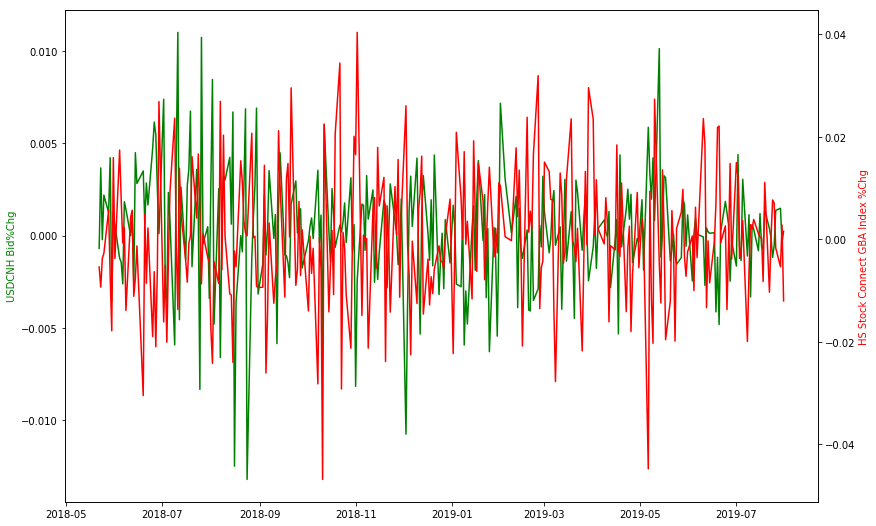

In [48]:
#plot the chart to show the 
df = pd.concat([GBAFX['Exchange Date'], GBAFX['Bid%Chg'], GBAindex['%Chg']], axis = 1, join = 'inner')
fig, ax1 = plt.subplots()

ax1.plot(GBAFX['Exchange Date'],  GBAFX['Bid%Chg'], color='g')
ax1.set_ylabel('USDCNH Bid%Chg', color='g')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(GBAFX['Exchange Date'], GBAindex['%Chg'], color='r')
ax2.set_ylabel('HS Stock Connect GBA Index %Chg', color='r') 
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(15, 8)
plt.show()

In [49]:
#Pearson Correlation between GBA index 'RefreshRate' and USDCNH FX 'Turnover - HKD' ---- Volume
volGBACorr = pearsonr(GBAFX['RefreshRate'], GBAindex['Turnover - HKD'])
volGBACorr

(-0.08921084907467752, 0.1212479949551725)

In [50]:
#Spearman Correlaton between GBA index 'RefreshRate' and USDCNH FX 'Turnover - HKD' ---- Volume
volGBACorrr = spearmanr(GBAFX['RefreshRate'], GBAindex['Turnover - HKD'])
volGBACorrr

SpearmanrResult(correlation=-0.0808648527862773, pvalue=0.16029252394800647)

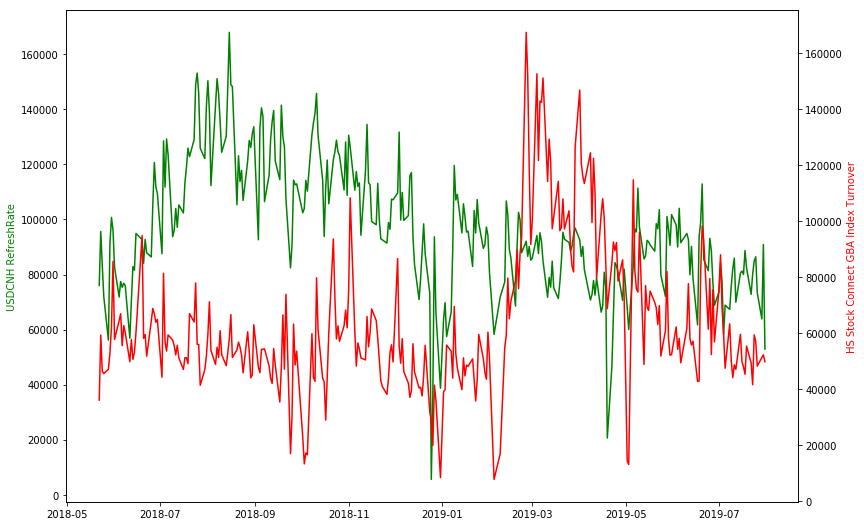

In [51]:
#plot the chart to show the 
df = pd.concat([GBAFX['Exchange Date'], GBAFX['RefreshRate'], GBAindex['Turnover - HKD']], axis = 1, join = 'inner')
fig, ax1 = plt.subplots()

ax1.plot(GBAFX['Exchange Date'],  GBAFX['RefreshRate'], color='g')
ax1.set_ylabel('USDCNH RefreshRate', color='g')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(GBAFX['Exchange Date'], GBAindex['Turnover - HKD'], color='r')
ax2.set_ylabel('HS Stock Connect GBA Index Turnover', color='r') 
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(15, 8)
plt.show()

Compare Hang Seng Stock Connect Hong Kong Index and USDCNH FX

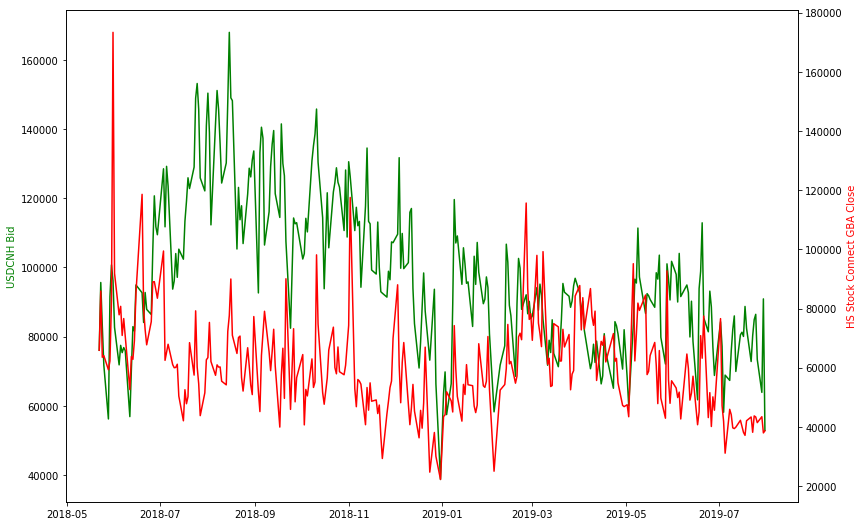

In [52]:
#plot the chart to show the 
df = pd.concat([HKFX['Exchange Date'],HKFX['Bid'], HKindex['Close']], axis = 1, join = 'inner')
fig, ax1 = plt.subplots()

ax1.plot(HKFX['Exchange Date'],  HKFX['RefreshRate'], color='g')
ax1.set_ylabel('USDCNH Bid', color='g')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(HKFX['Exchange Date'], HKindex['Turnover - HKD'], color='r')
ax2.set_ylabel('HS Stock Connect GBA Close', color='r') 
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(15, 8)
plt.show()

In [53]:
#Spearman Correlaton between GBA index'close' and USDCNH FX 'bid' ---- absolute value 
valueHKCorrr = spearmanr(HKFX['Bid'], HKindex['Close'])
valueHKCorrr

SpearmanrResult(correlation=-0.8085204469298504, pvalue=3.3074834204121635e-69)

In [54]:
#Spearman Correlaton between GBA index and USDCNH FX on %change ---- in %
percentHKCorrr = spearmanr(HKFX['Bid%Chg'], HKindex['%Chg'])
percentHKCorrr

SpearmanrResult(correlation=-0.25065505761142587, pvalue=1.3666138950261164e-05)

In [55]:
#Spearman Correlaton between GBA index 'RefreshRate' and USDCNH FX 'Turnover - HKD' ---- Volume
volHKCorrr = spearmanr(HKFX['RefreshRate'], HKindex['Turnover - HKD'])
volHKCorrr

SpearmanrResult(correlation=0.21206311833513342, pvalue=0.0002498873885176361)